In [0]:
%tensorflow_version 2.x  #切換版本

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  #切換版本`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
#基本套件
import matplotlib.pyplot as plt
import numpy as np
#FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
#CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

### 資料處理

In [0]:
#使用cifar10資料集
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
#載入
(x_train, y_train0), (x_test, y_test0) = datasets.cifar10.load_data()
#標準化
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

170500096/170498071 [==============================] - 11s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

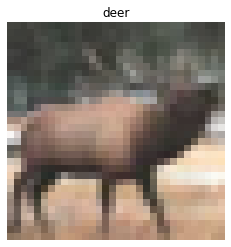

In [9]:
one_pic = np.random.randint(x_train.shape[0])
x_sample = x_train[one_pic]
y_sample = y_train0[one_pic].squeeze()

plt.imshow(x_sample)
plt.title(name_list[y_sample])
plt.axis('off');

### 建立我們的神經網路 CNN

In [0]:
#建立卷積神經網路，fiilter為16,64,128
CNN_layers = [Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(64, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]
#全連接層
FC_layers = [Dense(units=64, activation='relu'),
             Dense(units=10, activation='softmax')]

In [11]:
CNN_layers + FC_layers

In [0]:
model_1 = Sequential(CNN_layers+FC_layers)

In [13]:
#看一下summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 128)         73856     
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8

In [0]:
#compile
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

###開始訓練我們的模型


In [15]:
#batch size = 200 
#epoch = 10
model_1.fit(x_train, y_train, batch_size=200, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
250/250 [==============================] - 76s 303ms/step - loss: 1.9389 - categorical_accuracy: 0.2651 - val_loss: 1.7309 - val_categorical_accuracy: 0.3561
Epoch 2/10
250/250 [==============================] - 76s 304ms/step - loss: 1.6789 - categorical_accuracy: 0.3745 - val_loss: 1.5983 - val_categorical_accuracy: 0.4168
Epoch 3/10
250/250 [==============================] - 76s 304ms/step - loss: 1.5590 - categorical_accuracy: 0.4282 - val_loss: 1.5027 - val_categorical_accuracy: 0.4521
Epoch 4/10
250/250 [==============================] - 76s 305ms/step - loss: 1.4879 - categorical_accuracy: 0.4538 - val_loss: 1.4271 - val_categorical_accuracy: 0.4777
Epoch 5/10
250/250 [==============================] - 76s 304ms/step - loss: 1.4294 - categorical_accuracy: 0.4785 - val_loss: 1.3974 - val_categorical_accuracy: 0.4904
Epoch 6/10
250/250 [==============================] - 76s 304ms/step - loss: 1.3794 - categorical_accuracy: 0.4967 - val_loss: 1.4010 - val_categorical_acc

In [16]:
train_accuracy = model_1.evaluate(x_train, y_train)
test_accuracy = model_1.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.2026 - categorical_accuracy: 0.5690


In [28]:
#accuracy
print(f'train_accuracy: {train_accuracy[1]}')
print(f'test_accuracy: {test_accuracy[1]}')

train_accuracy: 0.5696799755096436
test_accuracy: 0.5677000284194946


### Cifar100

In [17]:
#讀入資料
(X_train, Y_train0), (X_test, Y_test0) = datasets.cifar100.load_data()

#標準化
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()


Y_train = to_categorical(Y_train0, 100)
Y_test = to_categorical(Y_test0, 100)

169009152/169001437 [==============================] - 11s 0us/step


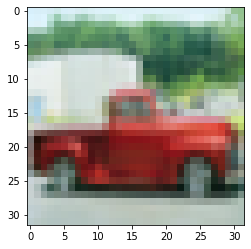

In [21]:
sec_pic = np.random.randint(X_train.shape[0])
X_sample = X_train[sec_pic]
Y_sample = Y_train0[sec_pic].squeeze()

plt.imshow(X_sample)

### 用Frozen訓練

In [0]:
for layer in CNN_layers:
    layer.trainable = False

In [0]:
FC_layers2 = [Dense(512, activation='relu'),
              Dense(256, activation='relu'),
              Dense(100, activation='softmax')]

### model2

In [31]:
model_2 = Sequential(CNN_layers+FC_layers2)
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 128)         73856     
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)              

In [0]:
model_2.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

###train

In [34]:
model_2.fit( X_train, Y_train, batch_size=200, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
250/250 [==============================] - 30s 119ms/step - loss: 3.4578 - accuracy: 0.1710 - val_loss: 3.3416 - val_accuracy: 0.1939
Epoch 2/10
250/250 [==============================] - 30s 120ms/step - loss: 3.2512 - accuracy: 0.2080 - val_loss: 3.2012 - val_accuracy: 0.2153
Epoch 3/10
250/250 [==============================] - 30s 119ms/step - loss: 3.1322 - accuracy: 0.2298 - val_loss: 3.1189 - val_accuracy: 0.2316
Epoch 4/10
250/250 [==============================] - 30s 119ms/step - loss: 3.0531 - accuracy: 0.2440 - val_loss: 3.0457 - val_accuracy: 0.2502
Epoch 5/10
250/250 [==============================] - 30s 119ms/step - loss: 2.9852 - accuracy: 0.2572 - val_loss: 3.0076 - val_accuracy: 0.2513
Epoch 6/10
250/250 [==============================] - 30s 119ms/step - loss: 2.9297 - accuracy: 0.2671 - val_loss: 2.9518 - val_accuracy: 0.2671
Epoch 7/10
250/250 [==============================] - 30s 120ms/step - loss: 2.8853 - accuracy: 0.2761 - val_loss: 2.9299 - val_ac

In [35]:
train_accuracy_2 = model_2.evaluate(X_train, Y_train)
test_accuracy_2 = model_2.evaluate(X_test, Y_test)

#accuracy
print(f'train_accuracy: {train_accuracy[1]}')
print(f'test_accuracy: {test_accuracy[1]}')

313/313 [==============================] - 6s 18ms/step - loss: 2.8367 - accuracy: 0.2924
train_accuracy: 0.5702400207519531
test_accuracy: 0.5690000057220459
